# Imports

In [2]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import os 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [3]:
df = pd.read_csv("Admission_Predict.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [5]:
df = df.drop('Serial No.',axis = 1)

In [6]:
df['Research'] = df['Research'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.1+ KB


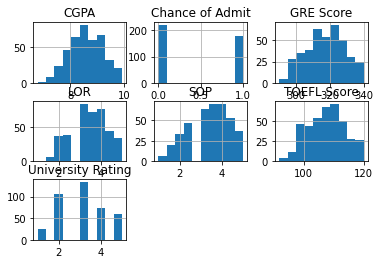

In [8]:
df.hist()
plt.show()

In [9]:
plt.rcParams['figure.figsize']=[15,8]

In [10]:
df['Chance of Admit'].value_counts()

0    220
1    180
Name: Chance of Admit, dtype: int64

In [11]:
df_target = pd.DataFrame(df['Chance of Admit'])
df_independent = df.drop('Chance of Admit',axis=1)

In [12]:
df_cat = df_independent.select_dtypes(include=['object','category'])
df_num = df_independent.select_dtypes(exclude=['object','category'])

In [13]:
# Encoding the Categorical data using N-1 dummy encoding
df_cat_encoded=pd.get_dummies(df_cat,drop_first=True)

In [14]:
# Merging the encoded data and numerical data
df_merged_independent = pd.concat([df_num,df_cat_encoded],axis=1)

In [15]:
df_merged_independent=sm.add_constant(df_merged_independent)

In [16]:
x_train, x_test, y_train, y_test=train_test_split(df_merged_independent,df_target, test_size=0.10, random_state=123)

In [17]:
model = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.256924
         Iterations 8


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  360
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            7
Date:                Sun, 21 Feb 2021   Pseudo R-squ.:                  0.6266
Time:                        17:48:38   Log-Likelihood:                -92.493
converged:                       True   LL-Null:                       -247.73
Covariance Type:            nonrobust   LLR p-value:                 3.501e-63
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -65.2330     10.011     -6.516      0.000     -84.854     -45.612
GRE Score             0.0728      0.035      2.054      0.040       0.003       0.142
TOEFL Score           0.0846      0.061      1.394      0.163      -0.034       0.203
University Rating     0.2547      0.271      0.939      0.348      -0.277       0.786
SOP                   0.3592      0.348      1.033      0.302      -0.323       1.041
LOR                   0.5572      0.332      1.678      0.093      -0.093       1.208
CGPA                  3.2910      0.755      4.357      0.000       1.810       4.772
Research_1            0.6681      0.419      1.596      0.110      -0.152       1.488
=====================================================================================
"""

In [19]:
train_predict = model.predict(x_train)
test_predict=y_pred = model.predict(x_test)

In [20]:
train_predict = [0 if x <.5 else 1 for x in train_predict]
test_predict = [0 if x <.5 else 1 for x in test_predict]

In [21]:
cm1 = confusion_matrix(train_predict,y_train)
print(cm1.ravel())

[180  23  18 139]


In [22]:
cm2 = confusion_matrix(test_predict,y_test)
print(cm2.ravel())

[20  3  2 15]


##### Notes
cm.ravel = [TN FP FN TP]

In [23]:
new_df=pd.DataFrame(data = cm1, columns= ['Predicted : 0','Predicted : 1'], index =['Actual : 0','Actual : 1'] )

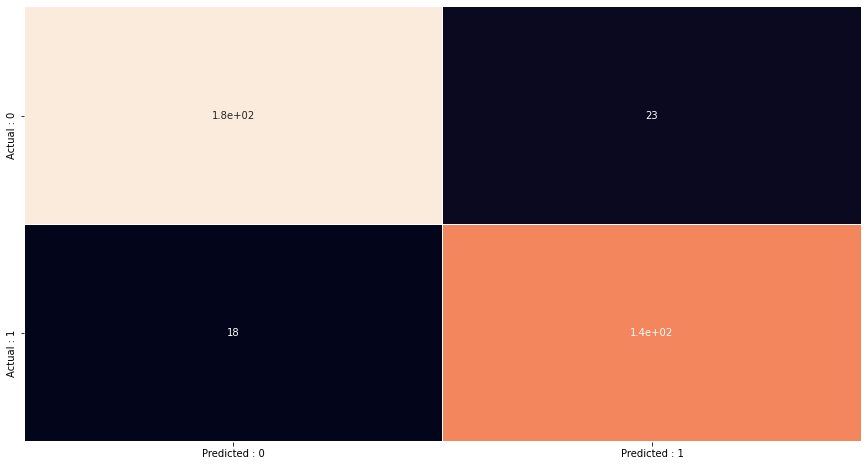

In [24]:
sns.heatmap(new_df,annot= True,linewidths =0.1,cbar=False)

In [25]:
TN,FP,FN,TP= cm1.ravel()

In [26]:
sensitivity = TP / (TP+FN)
print(sensitivity)

0.8853503184713376


In [27]:
specificity = TN /(TN + FP)
print(specificity)

0.8866995073891626


In [28]:
precision = TP / (TP+FP)
print(precision)

0.8580246913580247


In [29]:
F1_score = (2 * precision * sensitivity)/(precision+sensitivity)
print(F1_score)

0.871473354231975


In [30]:
train_classification=classification_report(train_predict,y_train)


In [31]:
print(train_classification)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       203
           1       0.86      0.89      0.87       157

    accuracy                           0.89       360
   macro avg       0.88      0.89      0.88       360
weighted avg       0.89      0.89      0.89       360



In [32]:
test_classification=classification_report(test_predict,y_test)

In [33]:
print(test_classification)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.83      0.88      0.86        17

    accuracy                           0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



Text(0.2, 0.95, '0.9545454545454545')

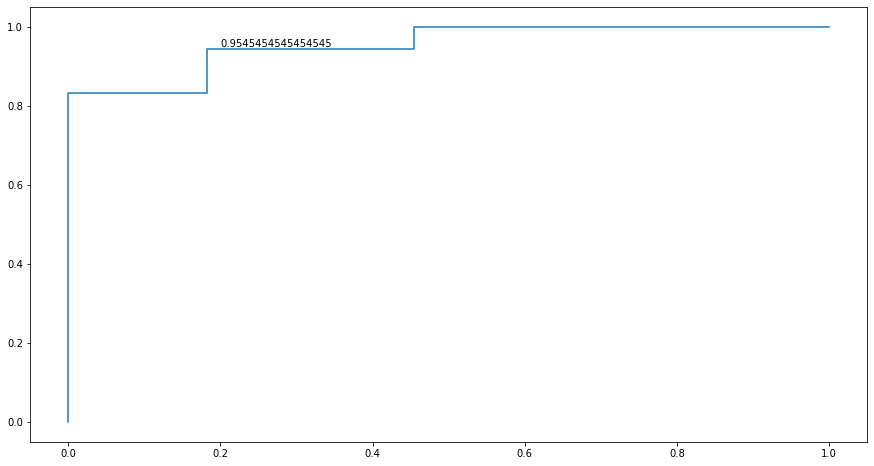

In [34]:
fpr,tpr,thresold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr)
plt.text(x=.2,y=.95,s=auc)